In [2]:
'''
#콜백
#얼리스타핑
#검증점수
#코드라인 완성하기
금중 주말간 숙제는 Ex5의 모델을 이용하여 학습하기

1.최적을 모델 기록을 위한 코드라인적용

2. 조건달성시 정지를 위한 코드라인

3. 검증data를 이용한 모델 평가'''

'\n#콜백\n#얼리스타핑\n#검증점수\n#코드라인 완성하기\n금중 주말간 숙제는 Ex5의 모델을 이용하여 학습하기\n\n1.최적을 모델 기록을 위한 코드라인적용\n\n2. 조건달성시 정지를 위한 코드라인\n\n3. 검증data를 이용한 모델 평가'

In [3]:
#가로세로높이
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.datasets.fashion_mnist import load_data
(x_data,y_data),(t_x_data,t_y_data) = load_data()
x_data = x_data.reshape(-1,28,28,1)/255.0 #이미지데이터의 전처리

t_x, tt_x, t_y, tt_y = train_test_split(x_data,y_data,test_size=0.2,random_state=42)
#s_t_x, v_x,s_t_y,v_y = train_test_split(t_x,t_y, random_state= 42, test_size= 0.2)

In [4]:
m = keras.Sequential()#모델 객체 생성
m.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',
                         input_shape= (28,28,1)))#단일 피쳐
#풀링작업
m.add(keras.layers.MaxPool2D(2))
#커널사이즈 = 가중치 사이즈
m.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
m.add(keras.layers.MaxPool2D(2))
# 작업 하나끝

In [5]:
m.add(keras.layers.Flatten())
m.add(keras.layers.Dense(100,activation='relu'))
m.add(keras.layers.Dropout(0.4))
m.add(keras.layers.Dense(10,activation='softmax'))
m.compile(loss='sparse_categorical_crossentropy',
          optimizer='adam',metrics='accuracy')
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [7]:

ck_p = keras.callbacks.ModelCheckpoint('best2_m.h5',save_best_only=True)
e_st = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True
                                    )
hy = m.fit(t_x,t_y, epochs=20,validation_data=(tt_x,tt_y),callbacks=[ck_p,e_st])

Epoch 1/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.5214 - accuracy: 0.8139 - val_loss: 0.3212 - val_accuracy: 0.8850
Epoch 2/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.3426 - accuracy: 0.8760 - val_loss: 0.2707 - val_accuracy: 0.9002
Epoch 3/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2971 - accuracy: 0.8937 - val_loss: 0.2503 - val_accuracy: 0.9071
Epoch 4/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2660 - accuracy: 0.9044 - val_loss: 0.2393 - val_accuracy: 0.9105
Epoch 5/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2419 - accuracy: 0.9114 - val_loss: 0.2285 - val_accuracy: 0.9160
Epoch 6/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2205 - accuracy: 0.9197 - val_loss: 0.2396 - val_accuracy: 0.9109
Epoch 7/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2034 - accuracy: 0.9261 - val_loss: 0.2304 -

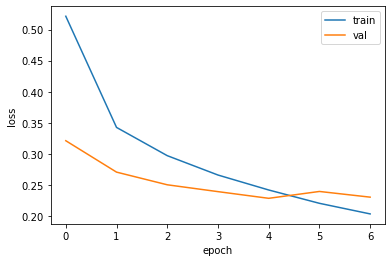

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [9]:
m.evaluate(tt_x,tt_y)

375/375 [==============================] - 2s 5ms/step - loss: 0.2285 - accuracy: 0.9160


[0.22851940989494324, 0.9160000085830688]

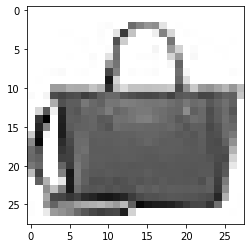

In [12]:
plt.imshow(tt_x[0].reshape(28,28),cmap = 'gray_r')
plt.show()

In [15]:
ck_data = m.predict(tt_x[0:1])

<BarContainer object of 10 artists>

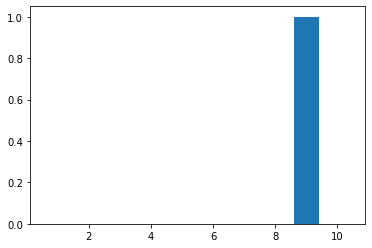

In [16]:
plt.bar(range(1,11),ck_data[0])

In [18]:
import numpy as np
classes = ['티셔츠','바지','스웨터','드레스',
           '코트','샌달','셔츠','스니커즈','가방','앵클 부츠']
classes[np.argmax(ck_data)]

'가방'

In [19]:
ck_data = t_x_data.reshape(-1,28,28,1)/255.0 
m.evaluate(ck_data,t_y_data)

313/313 [==============================] - 3s 6ms/step - loss: 0.2484 - accuracy: 0.9119


[0.24844133853912354, 0.911899983882904]

In [24]:
y_l=m.predict(ck_data[0:10])

In [22]:
classes[np.argmax(y_l[1:2])]

'스웨터'

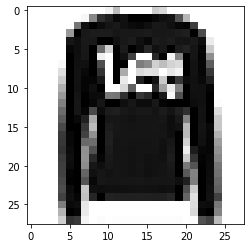

In [23]:
plt.imshow(ck_data[1].reshape(28,28),cmap = 'gray_r')
plt.show()

In [25]:
len(y_l)

10

앵클 부츠


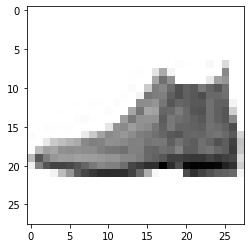

스웨터


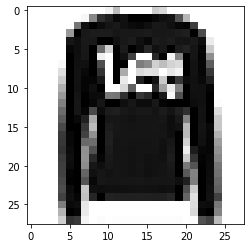

바지


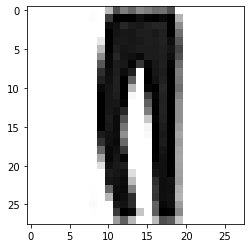

바지


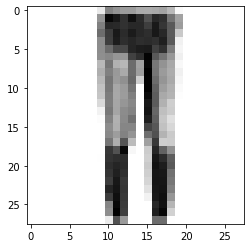

셔츠


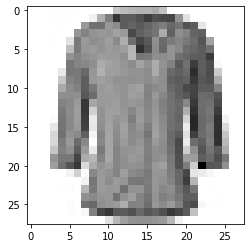

바지


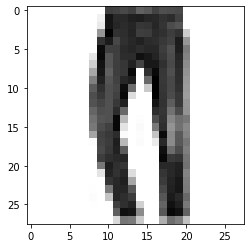

코트


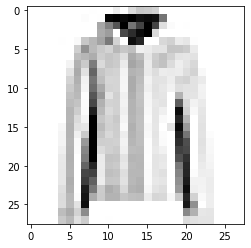

셔츠


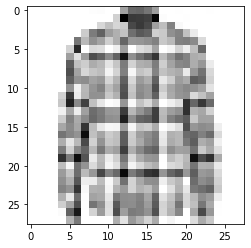

샌달


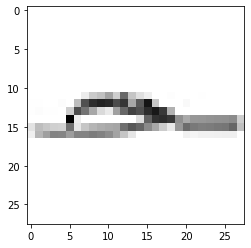

스니커즈


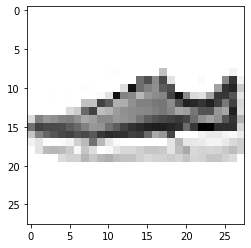

In [27]:
for i in range(len(y_l)):
    print(classes[np.argmax(y_l[i:i+1])])
    plt.imshow(ck_data[i].reshape(28,28),cmap = 'gray_r')
    plt.show()